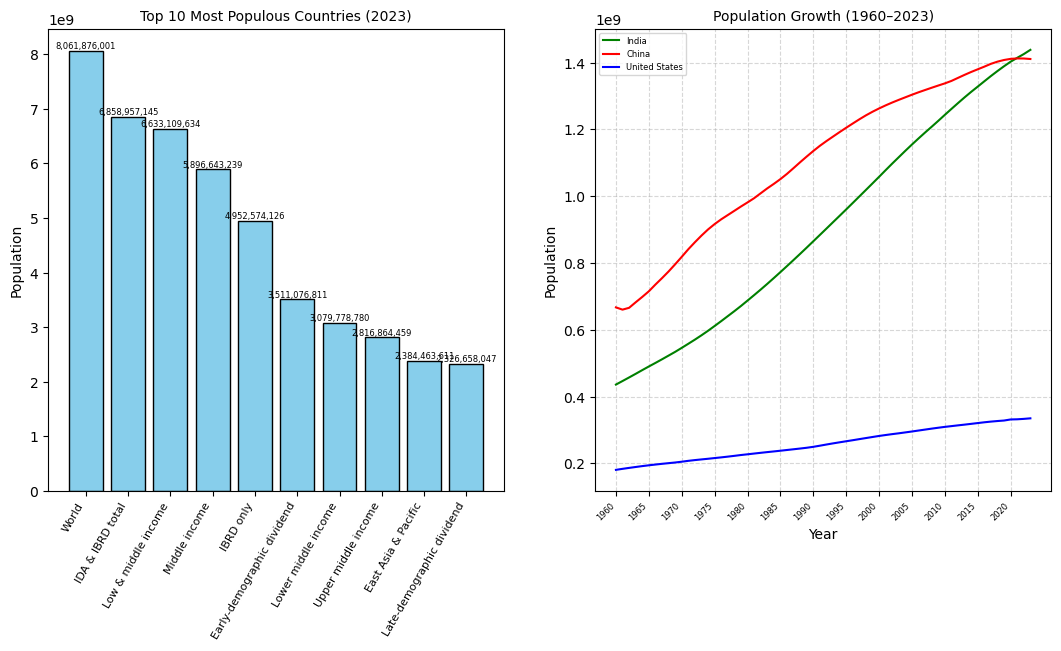

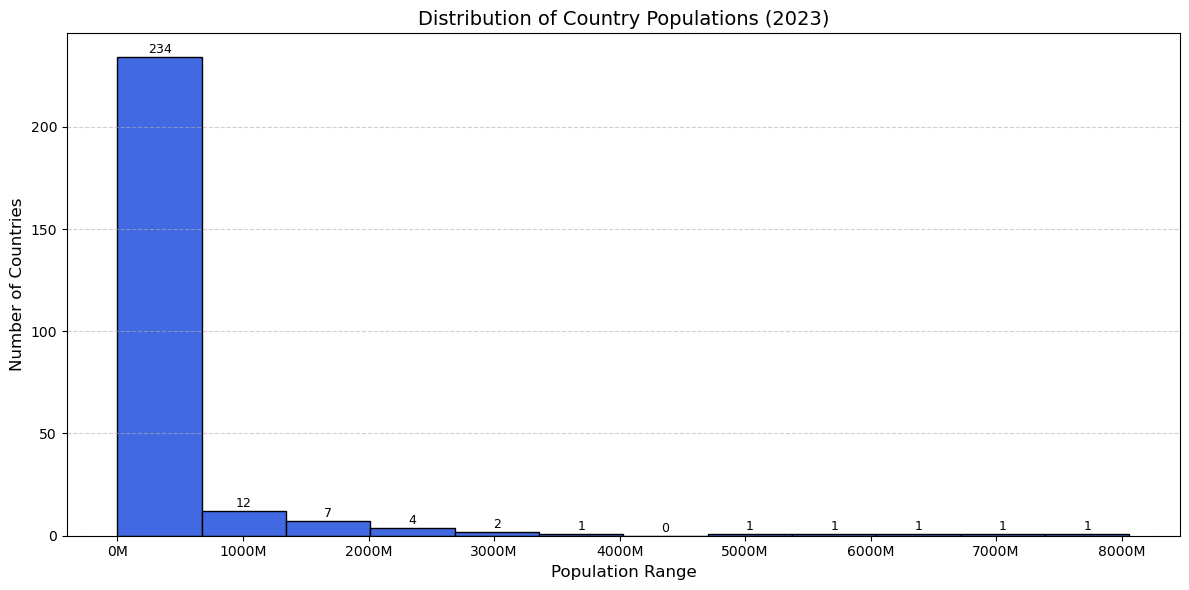

In [69]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt

source = "/Users/shrutijha/Downloads/Task-01.csv"
destination = "Task-01.csv"
shutil.copy(source, destination)

df = pd.read_csv("Task-01.csv")

year_columns = list(range(1960, 2024))  # 1960–2023
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(map(str, year_columns)) + ['Extra']
df = df.drop(columns=['Extra'], errors='ignore')  # Drop the unwanted last column

df = df[['Country Name'] + list(map(str, year_columns))]

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#Plotting
plt.figure(figsize=(20, 6))

#Bar Chart: Top 10 Countries by Population in 2023
plt.subplot(1, 3, 1)
top10 = df[['Country Name', '2023']].sort_values(by='2023', ascending=False).head(10)
bars = plt.bar(top10['Country Name'], top10['2023'], color='skyblue', edgecolor='black')
plt.title('Top 10 Most Populous Countries (2023)', fontsize=10)
plt.xticks(rotation=60, ha='right', fontsize=8)
plt.ylabel('Population')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}', 
             ha='center', va='bottom', fontsize=6)

#Line Chart: Growth of India, China, USA
plt.subplot(1, 3, 2)
df_line = df.set_index('Country Name').T
df_line.index = df_line.index.astype(str)
for country, color in zip(['India', 'China', 'United States'], ['green', 'red', 'blue']):
    if country in df_line.columns:
        plt.plot(df_line.index, df_line[country], label=country, color=color)

plt.title('Population Growth (1960–2023)', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Population')
xticks_to_show = df_line.index[::5]  # every 5 years
plt.xticks(ticks=xticks_to_show, rotation=45, ha='right', fontsize=6)

plt.legend(fontsize=6)
plt.grid(True, linestyle='--', alpha=0.5)

#Histogram: Population Distribution in 2023
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))  # Wider for better spacing

n, bins, patches = plt.hist(df['2023'].dropna(), bins=12, color='royalblue', edgecolor='black')

plt.title('Distribution of Country Populations (2023)', fontsize=14)
plt.xlabel('Population Range', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1_000_000)}M'))  # Show in Millions
plt.xticks(rotation=0)

for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2,
             n[i] + 0.5,
             int(n[i]),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


